In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Read data from output.txt
file_path = "output.txt"
data = []

with open(file_path, "r") as file:
    for line in file:
        numbers = list(map(float, line.split()))
        data.append(numbers)

data = np.array(data)


In [4]:
# Step 2: Flatten data (Each data point is now independent)
features = []
labels = []

for category_label, category_data in enumerate(data):
    for value in category_data:
        features.append([value])
        labels.append(category_label-1)

# Convert to DataFrame
df = pd.DataFrame(features, columns=["Value"])
df["Category"] = labels

In [5]:
# Step 3: Train-Test Split
X = df.drop(columns=["Category"])
y = df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Step 4: Normalize Features (Optional for Decision Tree)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Step 5: Train a Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
clf.fit(X_train, y_train)

# Step 7: Save the Model
joblib.dump(clf, "decision_tree_classifier.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved!")

Model and scaler saved!


##### Inference

In [14]:
import matplotlib.pyplot as plt
import joblib

In [15]:
# Read test data from file
test_file = "input.txt"  # Your test data file
data = []

with open(test_file, "r") as file:
    for line in file:
        numbers = list(map(float, line.split()))  # Convert space-separated numbers to float
        data.extend(numbers)  # Flatten into one list

data = np.array(data).reshape(-1, 1)  # Convert to column vector

/home/arif/CS773/pa1-main/test/occupancy_new/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


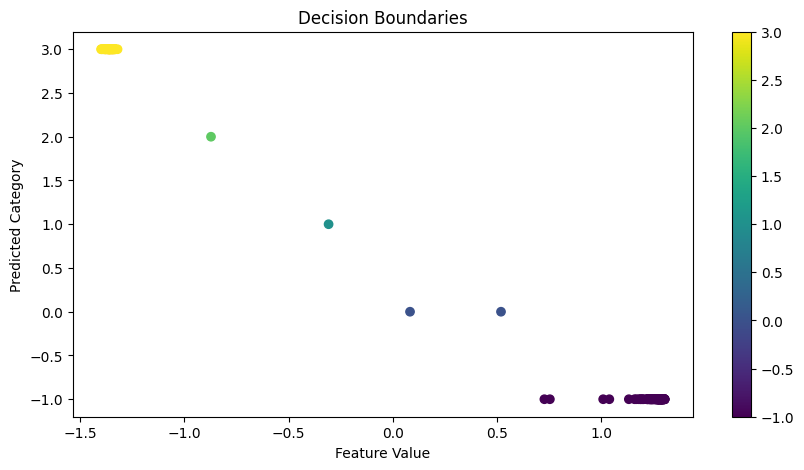

In [16]:
# Load model
clf = joblib.load("decision_tree_classifier.pkl")
scaler = joblib.load("scaler.pkl")

# Generate test values

data = scaler.transform(data)
# Predict
predictions = clf.predict(data)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(data, predictions, c=predictions, cmap="viridis", label="Predicted Category")
plt.xlabel("Feature Value")
plt.ylabel("Predicted Category")
plt.title("Decision Boundaries")
plt.colorbar()
plt.show()


In [17]:
predictions

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  3,  3